In [21]:
# 패션 MNIST - 훈련세트, 테스트 세트
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [22]:
# 모델 생성 함수 - 층 추가 가능
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28))) # 입력층
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [23]:
# model = model_fn()
model = model_fn(keras.layers.Dropout(0.3)) # 30% 비율의 밀즙층의 출력을 0으로 랜덤하게 변경
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
train_scaled = train_input / 255
test_scaled = test_input / 255

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=14, validation_data=(test_scaled, test_target)) # history 객체 - 정확도, 손실률에 대한 각 에포크별 측정 데이터
# 14 에포크 이후 과대적합 - 14 에포크가 최적 지점(현재로는 그렇다는 것. 재실행 시 바뀔 수도 있음)

Epoch 1/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7436 - loss: 0.7311 - val_accuracy: 0.8450 - val_loss: 0.4423
Epoch 2/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8422 - loss: 0.4367 - val_accuracy: 0.8525 - val_loss: 0.4029
Epoch 3/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8559 - loss: 0.3996 - val_accuracy: 0.8645 - val_loss: 0.3810
Epoch 4/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8646 - loss: 0.3717 - val_accuracy: 0.8681 - val_loss: 0.3663
Epoch 5/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8685 - loss: 0.3612 - val_accuracy: 0.8713 - val_loss: 0.3606
Epoch 6/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8713 - loss: 0.3524 - val_accuracy: 0.8743 - val_loss: 0.3588
Epoch 7/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8775 - loss: 0.3336 - val_accuracy: 0.8602 - val_loss: 0.3756
Epoch 8/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8789 - loss: 0.3257 - 

In [38]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


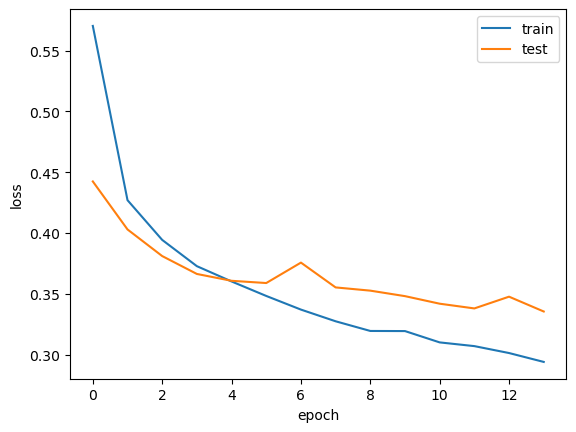

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # 학습 세트 손실률
plt.plot(history.history['val_loss']) # 테스트 세트 손실률
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

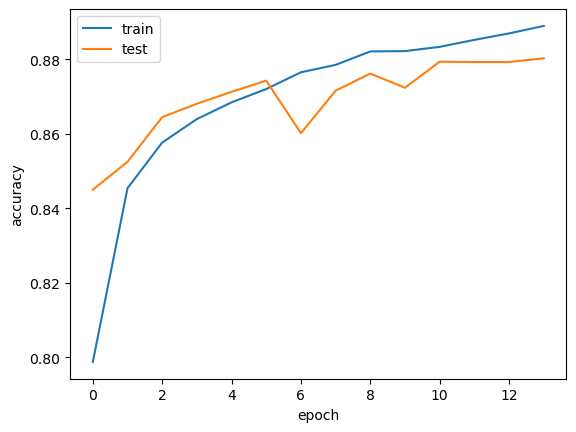

In [40]:
plt.plot(history.history['accuracy']) # 학습세트 정확도
plt.plot(history.history['val_accuracy']) # 테스트 세트 정확도
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [41]:
# 1. 가중치만 저장, 2. 모델 전체 저장
# model.save_weights("model.weights.h5") # h5 : HDFS - 가중치만 저장, 저장해준 모델과 동일한 구성 후 로드

In [42]:
# model = model_fn(keras.layers.Dropout(0.3))

In [43]:
# model.load_weights("model.weights.h5") # 앞서 학습한 에포크 거중치를 로드

In [44]:
# model.evaluate(test_scaled, test_target)

In [45]:
# predictions = model.predict(test_scaled)

In [46]:
# import numpy as np
# np.mean(test_target == predictions.argmax(axis=1)) # 정답 1, 오답 0

In [47]:
# 2. 모델 전체 저장
model.save("model-whole.keras")

In [48]:
# 저장된 모델 로드
model = keras.models.load_model("model-whole.keras")

In [51]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8806 - loss: 0.3296


[0.3354049324989319, 0.880299985408783]

In [52]:
# np.mean(test_target == model.predict(test_scaled, test_target).argmax(axis=1)